
# <center> Agentes Contaminantes 

## 1. Lectura de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# a. Leer el archivo CSV proporcionado y cargarlo en un DataFrame de pandas 
df = pd.read_csv('rama_2023_05_missing_outliers_limited.csv')


In [4]:
# b. Mostrar las primeras filas del DataFrame para entender la estructura de los datos
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


## 2. Gráfico de las variables

In [5]:
# Convertir la columna 'Fecha' al formato específico
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')


# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df[df['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)


In [6]:
df.set_index('fecha', inplace=True)
df.sort_index(inplace=True)

In [7]:
# a. Grafica las series de tiempo de cada variable para visualizar los datos a lo largo del tiempo
# Función para graficar series de tiempo con rango de fechas y zonas específicas
def plot_time_series(df, variables, ylabel, title, start_date=None, end_date=None):
    # Configurar el tamaño de la figura del gráfico
    plt.figure(figsize=(15, 5))
    
    # Si se proporcionan fechas de inicio y fin, filtrar el DataFrame para ese rango de fechas
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    # Iterar sobre cada zona especificada en la lista de zonas
    for variable in variables:
        # Crear el nombre de la columna combinando la zona y la variable
        column = f"{variable}"
        
        # Verificar si la columna existe en el DataFrame
        if column in df.columns:
            # Graficar la serie de tiempo de la columna
            plt.plot(df.index, df[column], label=column)
        else:
            # Imprimir un mensaje si la columna no se encuentra en el DataFrame
            print(f"Columna {column} no encontrada en el DataFrame")

    # Etiqueta del eje x
    plt.xlabel('Fecha')
    # Etiqueta del eje y
    plt.ylabel(ylabel)
    # Título del gráfico
    plt.title(title)
    # Mostrar la leyenda del gráfico
    plt.legend()
    # Mostrar el gráfico
    plt.show()

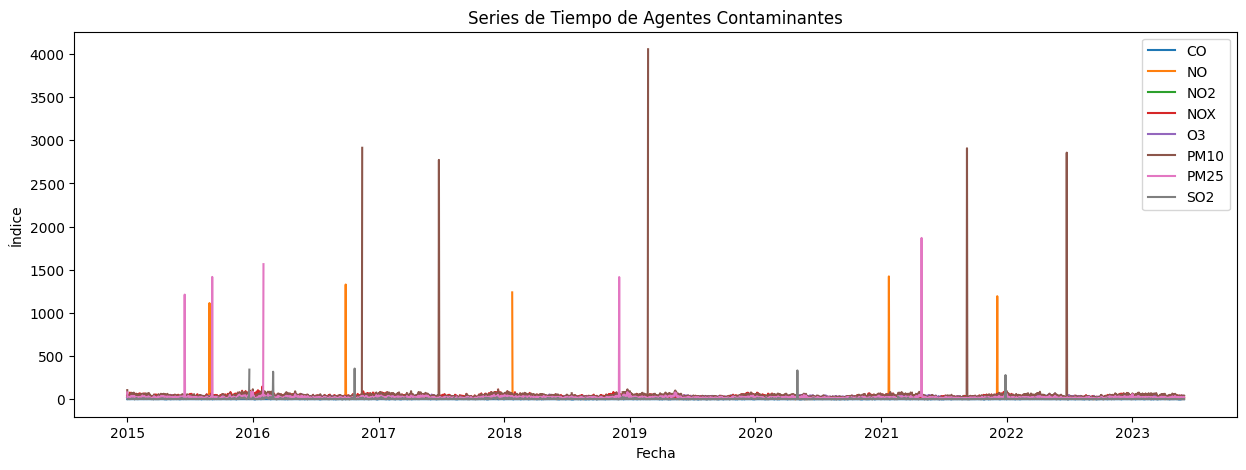

In [8]:
# Definir las zonas específicas que se desean graficar para PM10
variables_to_plot = ["CO","NO","NO2","NOX","O3","PM10","PM25","SO2"]

# Llamar a la función para graficar PM10 en las zonas específicas con el rango de fechas indicado
plot_time_series(df, variables_to_plot, 'Índice', 'Series de Tiempo de Agentes Contaminantes', start_date='2015-01-01', end_date='2023-12-31')

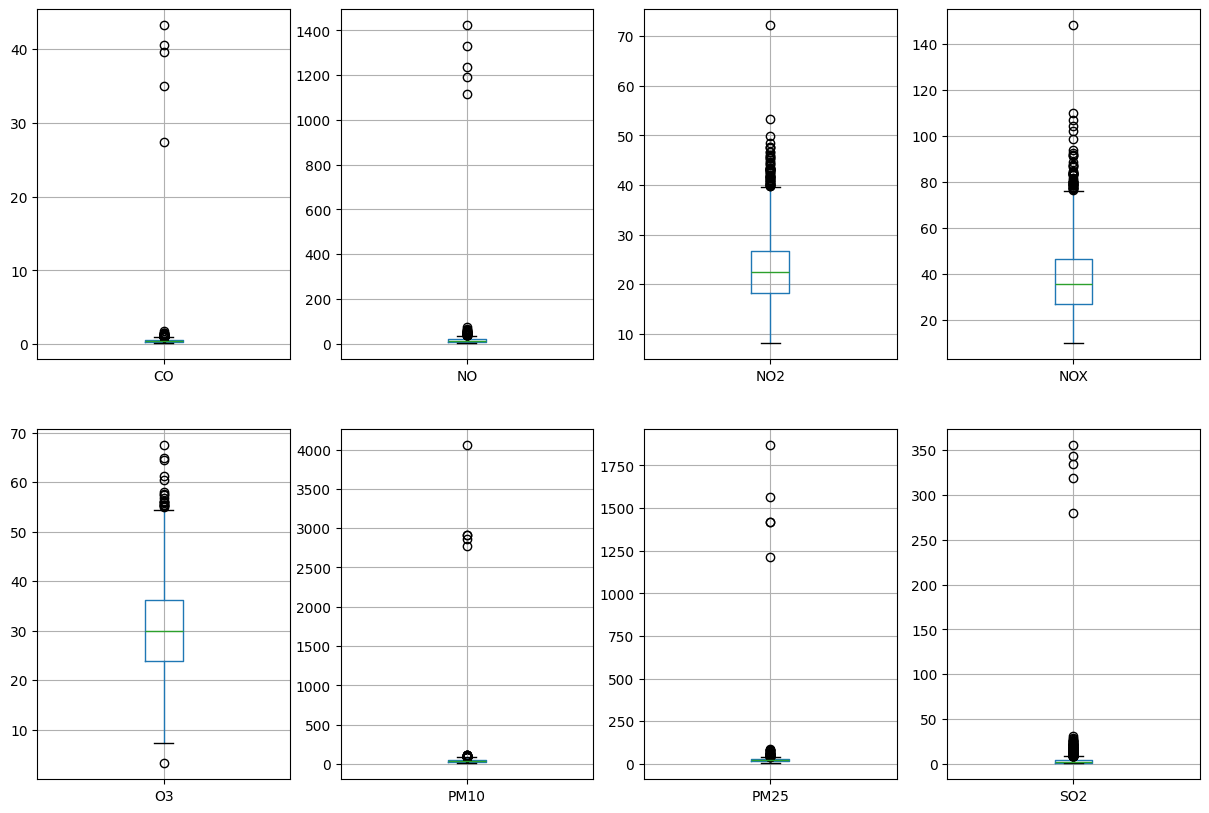

In [9]:
# b. Utiliza los gráficos para identificar visualmente los valores atípicos 
fig, axs = plt.subplots(2,4, figsize = (15,10))
df.boxplot(column = "CO", ax = axs[0,0])
df.boxplot(column = "NO", ax = axs[0,1])
df.boxplot(column = "NO2", ax = axs[0,2])
df.boxplot(column = "NOX", ax = axs[0,3])
df.boxplot(column = "O3", ax = axs[1,0])
df.boxplot(column = "PM10", ax = axs[1,1])
df.boxplot(column = "PM25", ax = axs[1,2])
df.boxplot(column = "SO2", ax = axs[1,3])

plt.show()
#Se utilizarán las gráficas para saber los límites sobre los que se considerarán datos atípicos

# 3. Identificación y Manejo de Valores Atípicos

In [10]:
from sklearn.impute import KNNImputer

In [11]:
# a. Realiza una condición para seleccionar los datos atípicos y sustitúyelos por un valor np.nan 
df.loc[df["CO"]>2, "CO"] = np.nan
df.loc[df["NO"]>100, "NO"] = np.nan
df.loc[df["NO2"]>60, "NO2"] = np.nan
df.loc[df["NOX"]>120, "NOX"] = np.nan
df.loc[df["O3"]>100, "O3"] = np.nan
df.loc[df["PM10"]>150, "PM10"] = np.nan
df.loc[df["PM25"]>100, "PM25"] = np.nan
df.loc[df["SO2"]>50, "SO2"] = np.nan

<Figure size 1200x600 with 0 Axes>

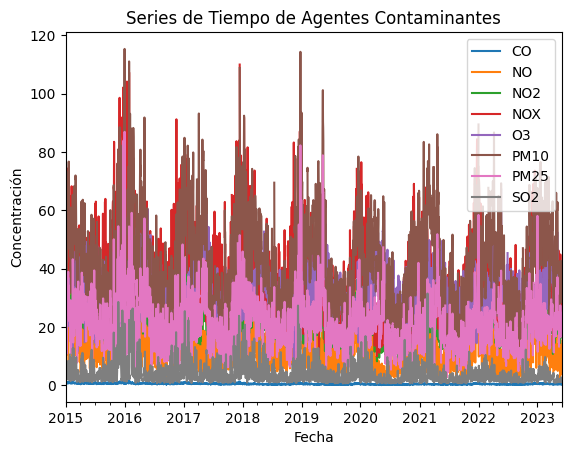


Número de valores nulos antes de la imputación:
CO      162
NO      160
NO2     158
NOX     143
O3      157
PM10    147
PM25    150
SO2     142
dtype: int64

Número de valores nulos después de la imputación:
CO      0
NO      0
NO2     0
NOX     0
O3      0
PM10    0
PM25    0
SO2     0
dtype: int64


<Figure size 1200x600 with 0 Axes>

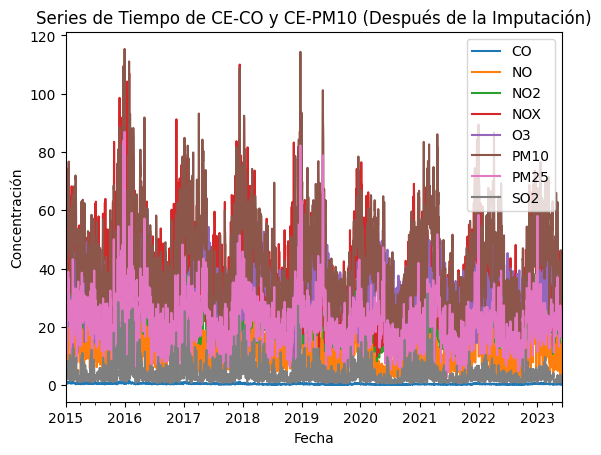

In [12]:
# Filtrar el DataFrame para obtener las columnas 'CE-CO' y 'CE-PM10' en el rango de fechas especificado
df_impute = df.loc['2015-01-01':'2023-12-31']

# Graficar las series de tiempo
plt.figure(figsize=(12, 6))
df_impute[["CO","NO","NO2","NOX","O3","PM10","PM25","SO2"]].plot()
plt.title('Series de Tiempo de Agentes Contaminantes')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df.isnull().sum())

# Crear una instancia del imputador KNN con 5 vecinos
imputer_knn = KNNImputer(n_neighbors=5)

# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = imputer_knn.fit_transform(df_impute)

# Contar y mostrar el número de valores nulos después de la imputación
print("\nNúmero de valores nulos después de la imputación:")
print(df_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después de la imputación
plt.figure(figsize=(12, 6))
df_impute[["CO","NO","NO2","NOX","O3","PM10","PM25","SO2"]].plot()
plt.title('Series de Tiempo de CE-CO y CE-PM10 (Después de la Imputación)')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()


# 4. Realiza un análisis descriptivo de las series de tiempo

**Se va a utilizar el subplot debajo para analizar la información para cada agente contaminante**

### CO
* **Tendencia**: Se observa una tendencia decreciente al pasar los años
* **Estacionalidad**: Hay un grado pequeño de estacionalidad el cual es afectado por la tendencia decreciente
* **Ruido**: Se observa un poco de ruido en los valores bajos de cada ciclo ya que hay mucha variación
### NO
* **Tendencia**: Hay una ligera tendencia decreciente
* **Estacionalidad**: Se observa fuerte estacionalidad en cada ciclo
* **Ruido**: Hay poco ruido debido a que hay poca variación entre ciclos
### NO2
* **Tendencia**: No hay una tendencia clara, los datos se mantienen cerca del mismo valor
* **Estacionalidad**: Se observa fuerte estacionalidad en cada ciclo
* **Ruido**: Hay una cierta cantidad de ruido ya que hay años con algo de variación comparado con los otros
### NOX
* **Tendencia**: Hay una ligera tendencia decreciente
* **Estacionalidad**: Se observa fuerte estacionalidad en cada ciclo
* **Ruido**: Hay muy poco ruido, la variación es pequeña
### O3
* **Tendencia**: Los datos se mantienen con valores constantes en cada ciclo
* **Estacionalidad**: Se observa fuerte estacionalidad en cada ciclo
* **Ruido**: Hay variación moderada entre años, por lo que hay algo de ruido
### PM10
* **Tendencia**: Los valores se mantienen con valores constantes con ligero decrecimiento
* **Estacionalidad**: Se observa una estacionalidad cada ciclo pero sin mucha estructura definida
* **Ruido**: Hay mucho ruido en los datos, lo cual reduce el efecto de estacionalidad
### PM25
* **Tendencia**: No se observa una tendencia clara, parece que el rango de valores no cambia mucho
* **Estacionalidad**: El efecto de estacionalidad es muy pequeño y sutil
* **Ruido**: Se observa mucho ruido en los datos
### SO2
* **Tendencia**: Se observa una ligera tendencia decreciente
* **Estacionalidad**: El efecto de estacionalidad es muy sutil, y no es constante
* **Ruido**: Se observa mucho ruido en los datos

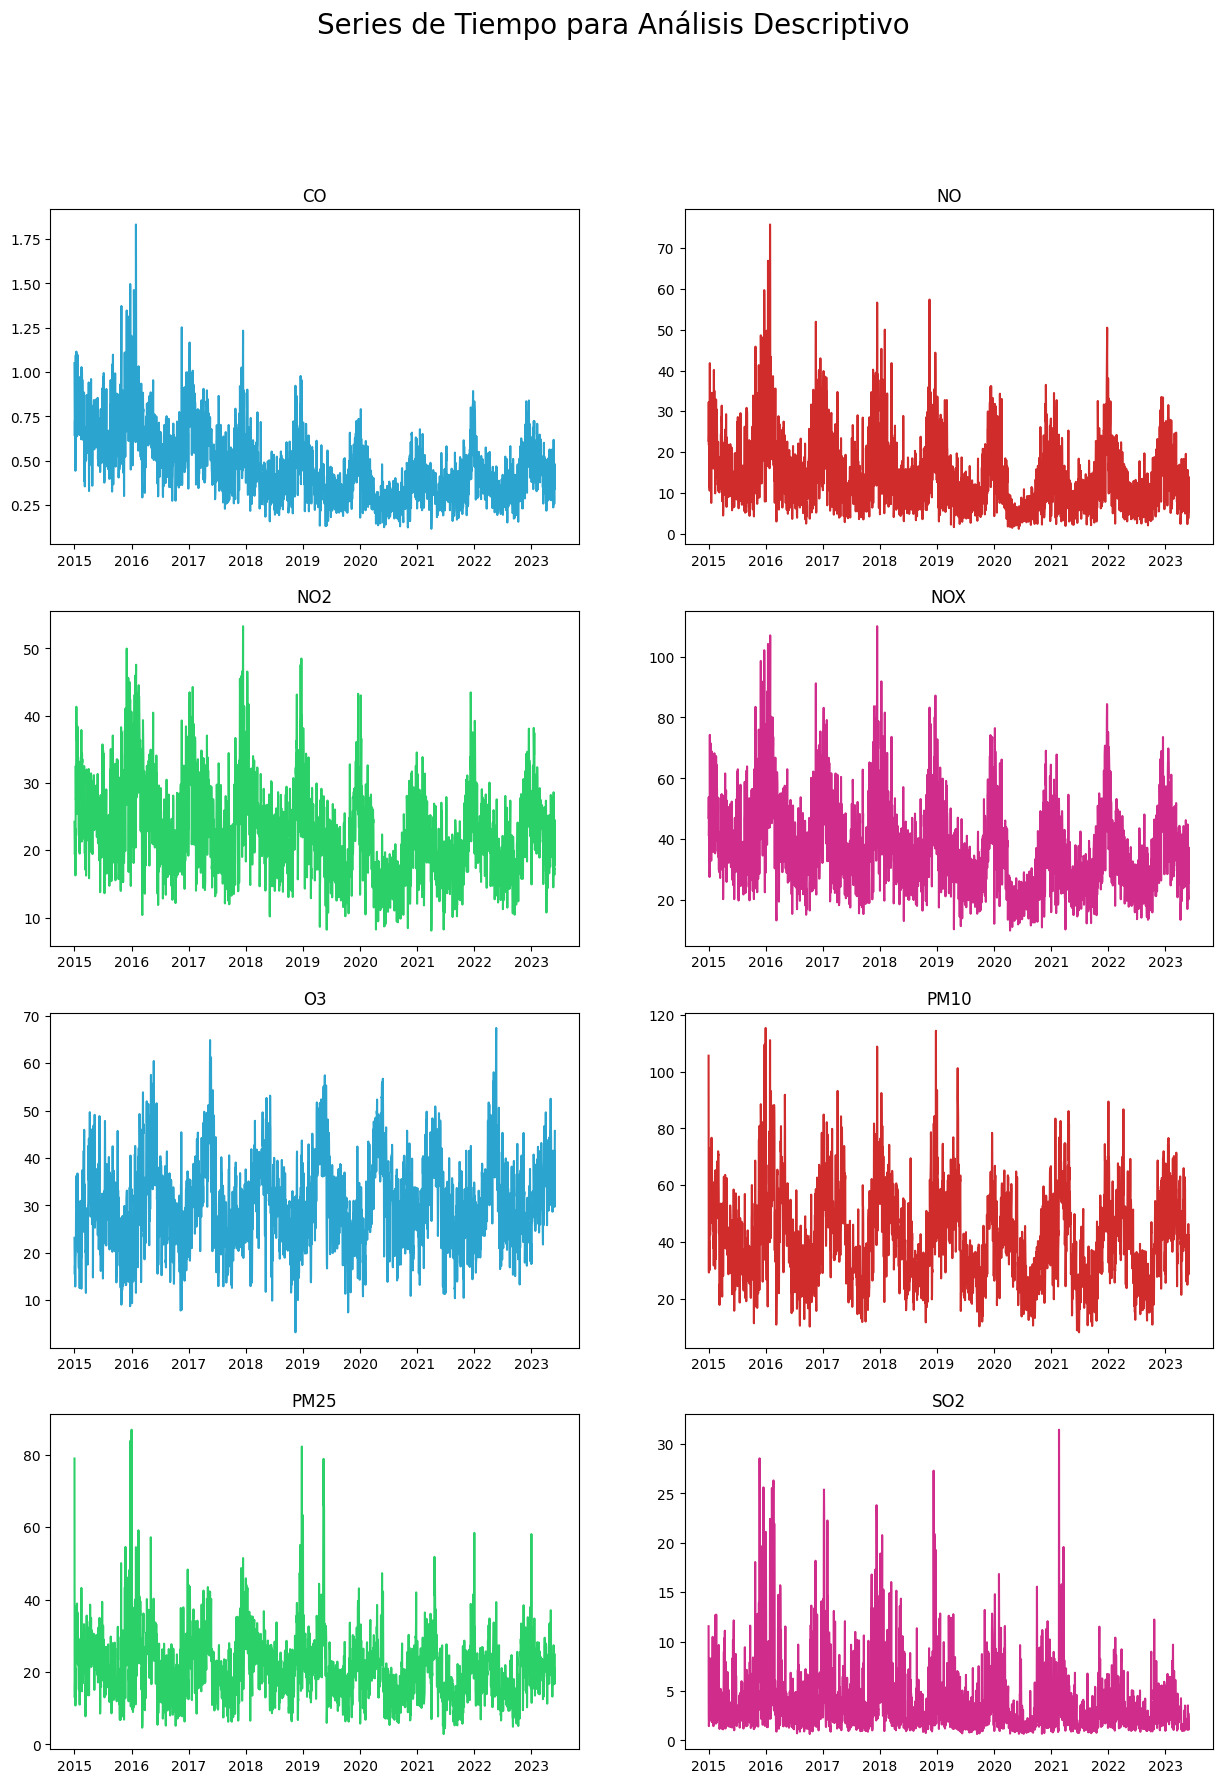

In [13]:
fig, axs = plt.subplots(4,2, figsize = (15,20))
axs[0,0].plot(df_impute['CO'], color = "#2CA4D0")
axs[0,0].set_title("CO")
axs[0,1].plot(df_impute['NO'], color = "#d02c2c")
axs[0,1].set_title("NO")
axs[1,0].plot(df_impute['NO2'], color = "#2cd068")
axs[1,0].set_title("NO2")
axs[1,1].plot(df_impute['NOX'], color = "#d02c8b")
axs[1,1].set_title("NOX")
axs[2,0].plot(df_impute['O3'], color = "#2CA4D0")
axs[2,0].set_title("O3")
axs[2,1].plot(df_impute['PM10'], color = "#d02c2c")
axs[2,1].set_title("PM10")
axs[3,0].plot(df_impute['PM25'], color = "#2cd068")
axs[3,0].set_title("PM25")
axs[3,1].plot(df_impute['SO2'], color = "#d02c8b")
axs[3,1].set_title("SO2")
fig.suptitle("Series de Tiempo para Análisis Descriptivo", fontsize = 20)
plt.show()

# 5. Modelado y Predicción

## Modelo Univariado Multistep

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense #Estos son las redes neuronales, Dense es para predecir (Capas Densamente conectada)
from tensorflow.keras import backend as K

In [21]:

def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2): #Los porcentajes de entrenamiento y de evaluación
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [23]:
# Paso 1: Leer el archivo CSV
file_path = 'df_knn_imputed.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")

Tamaño de datos de entrenamiento: 2151
Tamaño de datos de prueba: 614
Tamaño de datos de evaluación: 308


In [24]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 60 #Aquí le digo que tome 24 horas anteriores para predecir 12 horas a futuro
future_steps = 7 #Estos son los datos o números de datos que quiero predecir en el futuro
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CO']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

Tamaño de X_train: (2085, 60, 1)
Tamaño de y_train: (2085, 7)
Tamaño de X_test: (548, 60, 1)
Tamaño de y_test: (548, 7)
Tamaño de X_eval: (242, 60, 1)
Tamaño de y_eval: (242, 7)


Epoch 1/100


c:\Users\juanq\anaconda3\envs\Diplomado\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0735 - rmse: 0.2581 - val_loss: 0.0090 - val_rmse: 0.0948
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0128 - rmse: 0.1123 - val_loss: 0.0055 - val_rmse: 0.0716
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090 - rmse: 0.0948 - val_loss: 0.0049 - val_rmse: 0.0681
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - rmse: 0.0901 - val_loss: 0.0041 - val_rmse: 0.0611
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - rmse: 0.0853 - val_loss: 0.0038 - val_rmse: 0.0589
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076 - rmse: 0.0873 - val_loss: 0.0039 - val_rmse: 0.0595
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - rmse: 0.0869 - val_loss: 0.0039 - val_rmse: 0.0595
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071 - rmse: 0.0842 - val_loss: 0.0037 - val_rmse: 0.0575
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

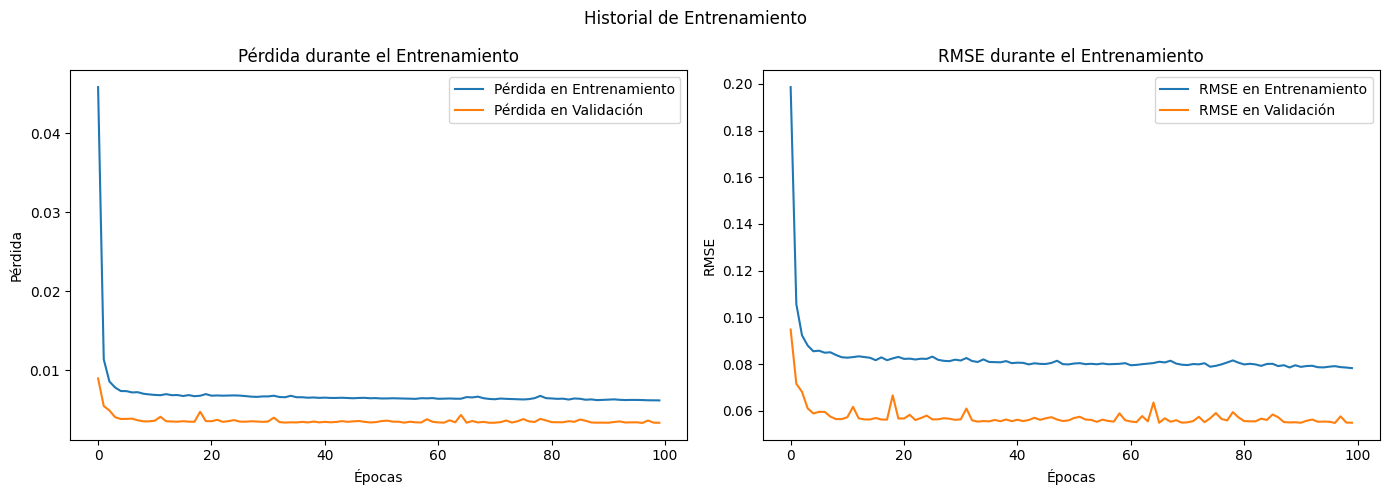

In [25]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


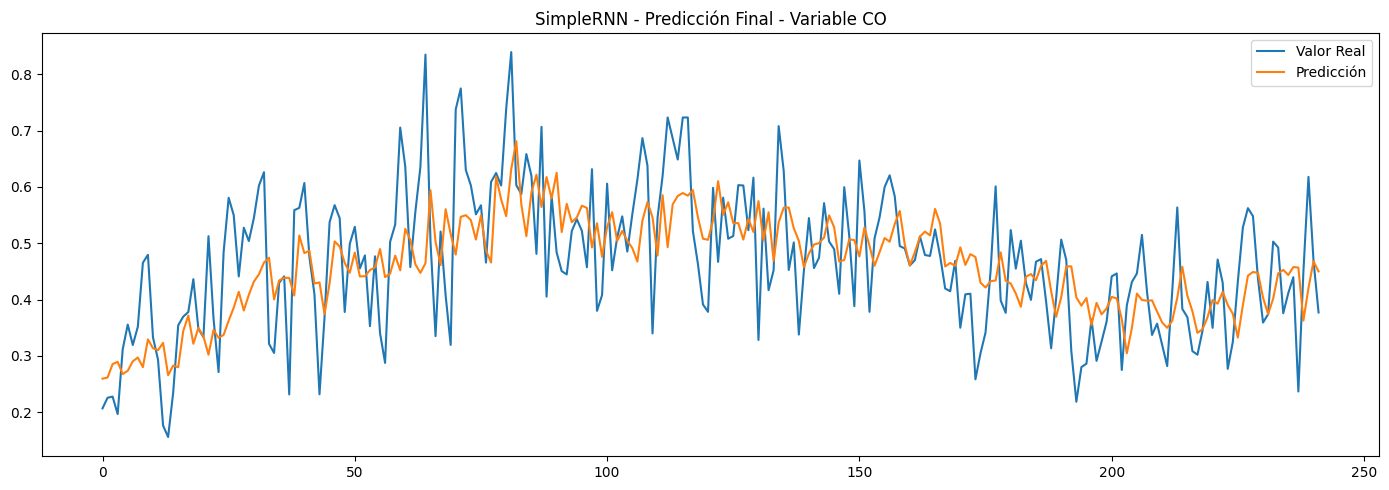

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


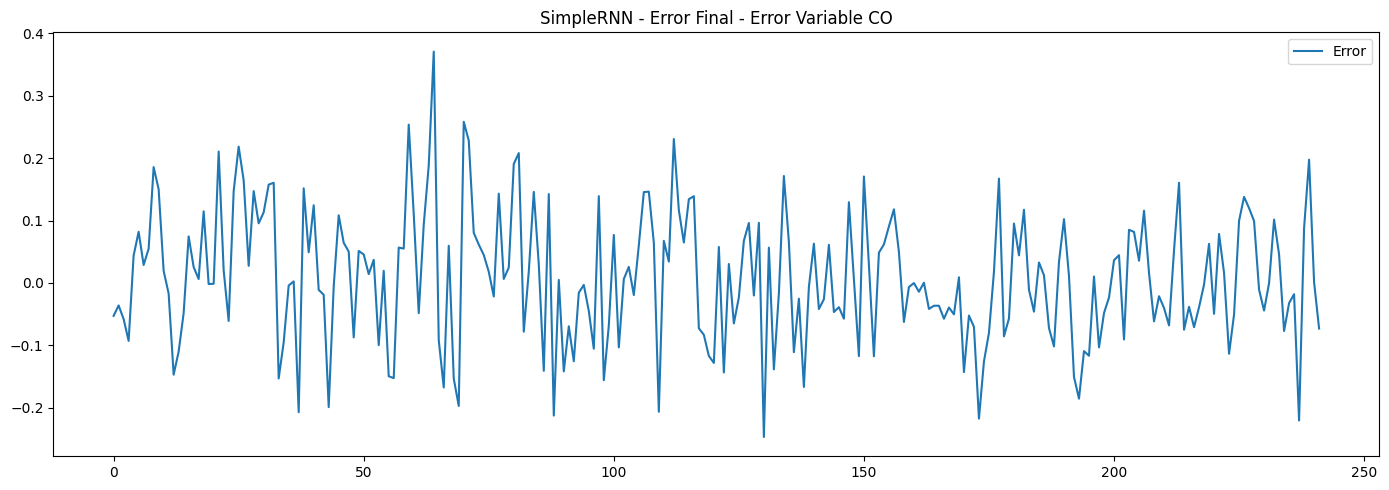

In [26]:
#VISUALIZAR PREDICCIONES Y ERRORES
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


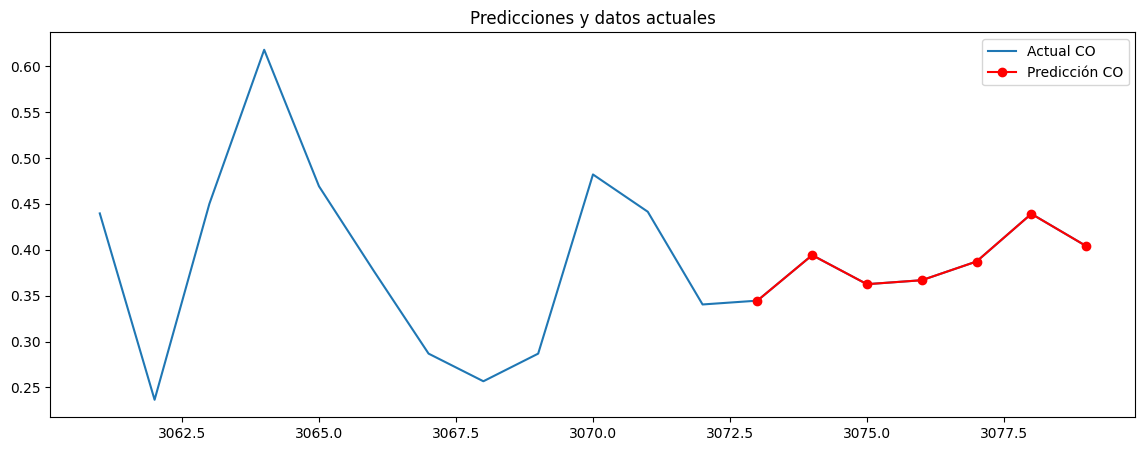

In [27]:
#VER SERIE DE TIEMPO CON  PREDICCIONES 
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.

    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.

    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}

    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])

    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)

    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)

    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)

    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)

    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)

    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.

    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')

    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

Los datos predecidos muestran una ligera tendecia creciente

##  Modelo Multivariado multi-step

ESCOGEREMOS CO, NO, NO2 Y NOX PARA PREDECIR CO. UTILIZAREMOS 60 DÍAS PARA PREDECIR 7 


In [28]:
def rmse(y_true, y_pred):
    """
    Calcula el error cuadrático medio (RMSE) entre las predicciones y los valores verdaderos.

    Args:
        y_true (tensor): Valores verdaderos.
        y_pred (tensor): Valores predichos.

    Returns:
        tensor: RMSE.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def split_dataframe(df, train_ratio=0.7, test_ratio=0.2): #Los porcentajes de entrenamiento y de evaluación
    """
    Divide un DataFrame en conjuntos de entrenamiento, prueba y evaluación.

    Args:
        df (DataFrame): El DataFrame a dividir.
        train_ratio (float, optional): Proporción de datos para entrenamiento. Defaults to 0.7.
        test_ratio (float, optional): Proporción de datos para prueba. Defaults to 0.2.

    Returns:
        tuple: DataFrames de entrenamiento, prueba y evaluación.
    """
    total_size = len(df)  # Tamaño total del DataFrame
    train_size = int(total_size * train_ratio)  # Tamaño del conjunto de entrenamiento
    test_size = int(total_size * test_ratio)  # Tamaño del conjunto de prueba
    eval_size = total_size - train_size - test_size  # Tamaño del conjunto de evaluación
    
    df_train = df.iloc[:train_size]  # Conjunto de entrenamiento
    df_test = df.iloc[train_size:train_size + test_size]  # Conjunto de prueba
    df_eval = df.iloc[train_size + test_size:]  # Conjunto de evaluación
    
    return df_train, df_test, df_eval


def scale_datasets(train_df, test_df, eval_df):
    """
    Escala los conjuntos de datos de entrenamiento, prueba y evaluación.

    Args:
        train_df (DataFrame): DataFrame de entrenamiento.
        test_df (DataFrame): DataFrame de prueba.
        eval_df (DataFrame): DataFrame de evaluación.

    Returns:
        tuple: DataFrames escalados de entrenamiento, prueba y evaluación, y diccionario de escaladores.
    """
    scalers = {}  # Diccionario para almacenar los escaladores
    scaled_train_df = train_df.copy()  # Copia del DataFrame de entrenamiento
    scaled_test_df = test_df.copy()  # Copia del DataFrame de prueba
    scaled_eval_df = eval_df.copy()  # Copia del DataFrame de evaluación
    
    for column in train_df.columns:
        scaler = MinMaxScaler()  # Crear un escalador MinMax para cada columna
        scaled_train_df[column] = scaler.fit_transform(train_df[[column]])  # Ajustar y transformar los datos de entrenamiento
        scaled_test_df[column] = scaler.transform(test_df[[column]])  # Transformar los datos de prueba
        scaled_eval_df[column] = scaler.transform(eval_df[[column]])  # Transformar los datos de evaluación
        scalers[column] = scaler  # Guardar el escalador para cada columna
        
    return scaled_train_df, scaled_test_df, scaled_eval_df, scalers

def create_sequences(data, input_columns, output_columns, time_steps, future_steps=1):
    """
    Crea secuencias de datos para modelado de series temporales.

    Args:
        data (DataFrame): DataFrame con los datos.
        input_columns (list): Columnas de entrada.
        output_columns (list): Columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias de entrada.
        future_steps (int, optional): Número de pasos de tiempo futuros para las secuencias de salida. Defaults to 1.

    Returns:
        tuple: Arrays de entrada y salida para el modelo.
    """
    X, y = [], []  # Listas para almacenar las secuencias de entrada y salida
    data_array = data.values  # Convertir el DataFrame a un array numpy

    input_indices = data.columns.get_indexer(input_columns)  # Índices de las columnas de entrada
    output_indices = data.columns.get_indexer(output_columns)  # Índices de las columnas de salida

    for i in range(len(data) - time_steps - future_steps + 1):
        X.append(data_array[i:i + time_steps, input_indices])  # Crear secuencia de entrada
        y.append(data_array[i + time_steps:i + time_steps + future_steps, output_indices].flatten())  # Crear secuencia de salida
    
    return np.array(X), np.array(y)

def create_simple_rnn_model(input_shape, output_size, future_steps, rnn_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo SimpleRNN.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        rnn_units (int, optional): Unidades de la capa RNN. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de SimpleRNN.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(SimpleRNN(rnn_units, input_shape=input_shape, return_sequences=False))  # Añadir capa SimpleRNN
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def create_lstm_model(input_shape, output_size, future_steps, lstm_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo LSTM.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        lstm_units (int, optional): Unidades de la capa LSTM. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de LSTM.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(LSTM(lstm_units, input_shape=input_shape, return_sequences=False))  # Añadir capa LSTM
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model


def create_gru_model(input_shape, output_size, future_steps, gru_units=50, hidden_units=50, output_activation='linear'):
    """
    Crea un modelo GRU.

    Args:
        input_shape (tuple): Forma de las secuencias de entrada.
        output_size (int): Tamaño de la salida.
        future_steps (int): Número de pasos de tiempo futuros.
        gru_units (int, optional): Unidades de la capa GRU. Defaults to 50.
        hidden_units (int, optional): Unidades de la capa oculta. Defaults to 50.
        output_activation (str, optional): Activación de la capa de salida. Defaults to 'linear'.

    Returns:
        model: Modelo compilado de GRU.
    """
    model = Sequential()  # Crear un modelo secuencial
    model.add(GRU(gru_units, input_shape=input_shape, return_sequences=False))  # Añadir capa GRU
    model.add(Dense(hidden_units, activation='relu'))  # Añadir capa oculta densa
    model.add(Dense(output_size * future_steps, activation=output_activation))  # Añadir capa de salida
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Compilar el modelo
    return model

def plot_final_prediction(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica las predicciones finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(y_rescaled[:, i], label='Valor Real')  # Graficar valores reales
        plt.plot(predictions_rescaled[:, -1, i], label='Predicción')  # Graficar predicciones
        plt.title(f'{title} - Variable {output_columns[i]}')  # Añadir título
        plt.legend()  
    
    plt.tight_layout() 
    plt.show() 

# Función para graficar los errores finales del modelo
def plot_final_errors(model, X, y, scalers, output_columns, future_steps, title):
    """
    Grafica los errores finales del modelo en comparación con los valores reales.

    Args:
        model (Sequential): Modelo entrenado.
        X (ndarray): Datos de entrada.
        y (ndarray): Valores reales.
        scalers (dict): Diccionario de escaladores para reescalar los datos.
        output_columns (list): Columnas de salida.
        future_steps (int): Número de pasos de tiempo futuros.
        title (str): Título de la gráfica.
    """
    predictions = model.predict(X).reshape(-1, future_steps, len(output_columns))  # Realizar predicciones y darles forma
    
    # Reescalar las predicciones y los valores reales
    y_rescaled = np.zeros((y.shape[0], len(output_columns)))
    predictions_rescaled = np.zeros((predictions.shape[0], future_steps, len(output_columns)))
    
    for i, column in enumerate(output_columns):
        y_rescaled[:, i] = scalers[column].inverse_transform(y[:, i].reshape(-1, 1)).reshape(-1)  # Reescalar valores reales
        for step in range(future_steps):
            predictions_rescaled[:, step, i] = scalers[column].inverse_transform(predictions[:, step, i].reshape(-1, 1)).reshape(-1)  # Reescalar predicciones
    
    errors_rescaled = y_rescaled - predictions_rescaled[:, -1, :]  # Calcular errores reescalados
    
    plt.figure(figsize=(14, 5))  # Crear figura
    for i in range(len(output_columns)):
        plt.plot(errors_rescaled[:, i], label='Error')  # Graficar errores
        plt.title(f'{title} - Error Variable {output_columns[i]}')  # Añadir título
        plt.legend() 
    
    plt.tight_layout()  
    plt.show()

def plot_training_history(history, title='Historial de Entrenamiento'):
    """
    Grafica el historial de entrenamiento del modelo.

    Args:
        history (History): Historial de entrenamiento del modelo.
        title (str, optional): Título de la gráfica. Defaults to 'Historial de Entrenamiento'.
    """
    # Extraer la información del historial
    history_dict = history.history
    
    # Crear una figura
    plt.figure(figsize=(14, 5))

    # Graficar la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Pérdida en Entrenamiento')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Pérdida en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida durante el Entrenamiento')
    plt.legend()

    # Graficar la métrica RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['rmse'], label='RMSE en Entrenamiento')
    if 'val_rmse' in history_dict:
        plt.plot(history_dict['val_rmse'], label='RMSE en Validación')
    plt.xlabel('Épocas')
    plt.ylabel('RMSE')
    plt.title('RMSE durante el Entrenamiento')
    plt.legend()

    # Ajustar el diseño y mostrar la gráfica
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [29]:
# Paso 1: Leer el archivo CSV
file_path = 'df_knn_imputed.csv'  # Reemplaza con la ruta a tu archivo
df = pd.read_csv(file_path)

df_train, df_test, df_eval = split_dataframe(df, train_ratio=0.7, test_ratio=0.2)

print(f"Tamaño de datos de entrenamiento: {len(df_train)}")
print(f"Tamaño de datos de prueba: {len(df_test)}")
print(f"Tamaño de datos de evaluación: {len(df_eval)}")

Tamaño de datos de entrenamiento: 2151
Tamaño de datos de prueba: 614
Tamaño de datos de evaluación: 308


In [30]:
scaled_train_df, scaled_test_df, scaled_eval_df, scalers = scale_datasets(df_train, df_test, df_eval)

time_steps = 60 #Aquí le digo que tome 24 horas anteriores para predecir 12 horas a futuro
future_steps = 7 #Estos son los datos o números de datos que quiero predecir en el futuro
#input_columns = ['CE-CO','CE-PM10','julian_day','hour']  # Nombres de las columnas de entrada en el DataFrame escalado
input_columns = ['CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM25', 'SO2']  # Nombres de las columnas de entrada en el DataFrame escalado
output_columns = ['CO']  # Nombres de las columnas de salida en el DataFrame escalado


X_train, y_train = create_sequences(scaled_train_df, input_columns, output_columns, time_steps, future_steps)
X_test, y_test = create_sequences(scaled_test_df, input_columns, output_columns, time_steps, future_steps)
X_eval, y_eval = create_sequences(scaled_eval_df, input_columns, output_columns, time_steps, future_steps)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_eval: {X_eval.shape}")
print(f"Tamaño de y_eval: {y_eval.shape}")

input_shape = (X_train.shape[1], X_train.shape[2])
output_size = len(output_columns)

Tamaño de X_train: (2085, 60, 7)
Tamaño de y_train: (2085, 7)
Tamaño de X_test: (548, 60, 7)
Tamaño de y_test: (548, 7)
Tamaño de X_eval: (242, 60, 7)
Tamaño de y_eval: (242, 7)


Epoch 1/100


c:\Users\juanq\anaconda3\envs\Diplomado\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0591 - rmse: 0.2313 - val_loss: 0.0124 - val_rmse: 0.1076
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - rmse: 0.1200 - val_loss: 0.0074 - val_rmse: 0.0833
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0110 - rmse: 0.1047 - val_loss: 0.0068 - val_rmse: 0.0793
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0097 - rmse: 0.0983 - val_loss: 0.0055 - val_rmse: 0.0717
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - rmse: 0.0962 - val_loss: 0.0052 - val_rmse: 0.0694
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - rmse: 0.0933 - val_loss: 0.0050 - val_rmse: 0.0683
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - rmse: 0.0884 - val_loss: 0.0050 - val_rmse: 0.0678
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0078 - rmse: 0.0881 - val_loss: 0.0046 - val_rmse: 0.0653
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - 

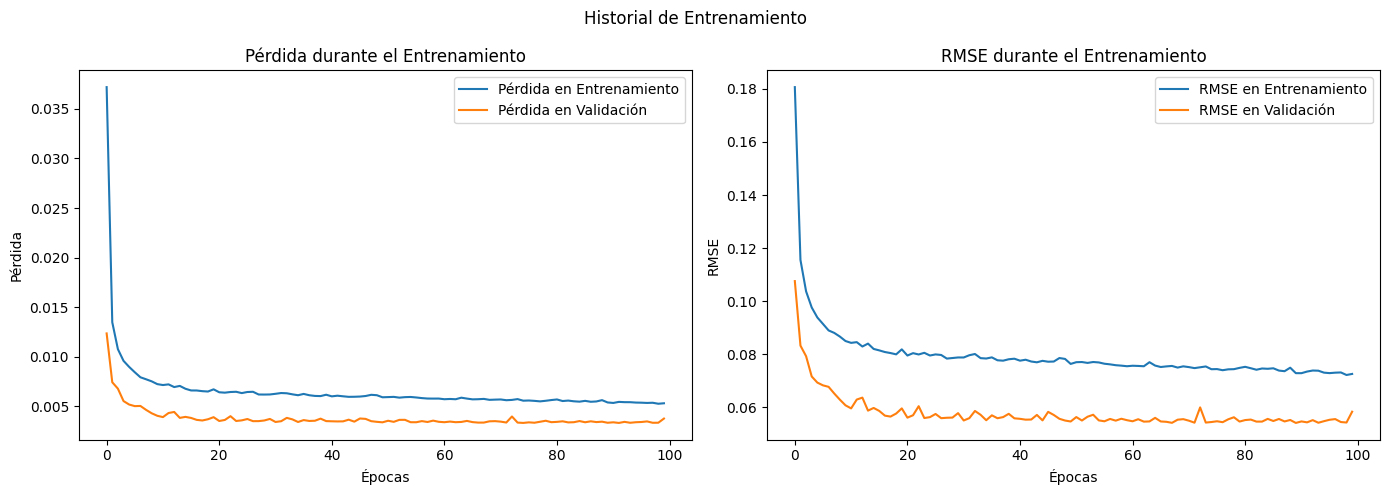

In [31]:
# Crear y entrenar el modelo SimpleRNN
model_simple_rnn = create_simple_rnn_model(input_shape, output_size, future_steps)
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), shuffle=True)
plot_training_history(history_simple_rnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


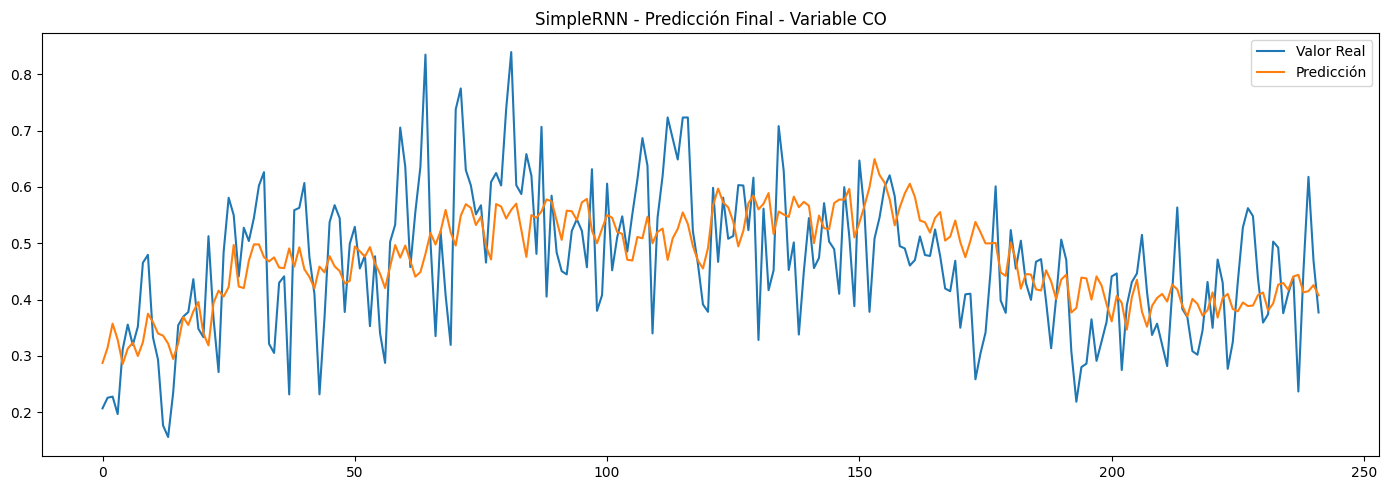

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


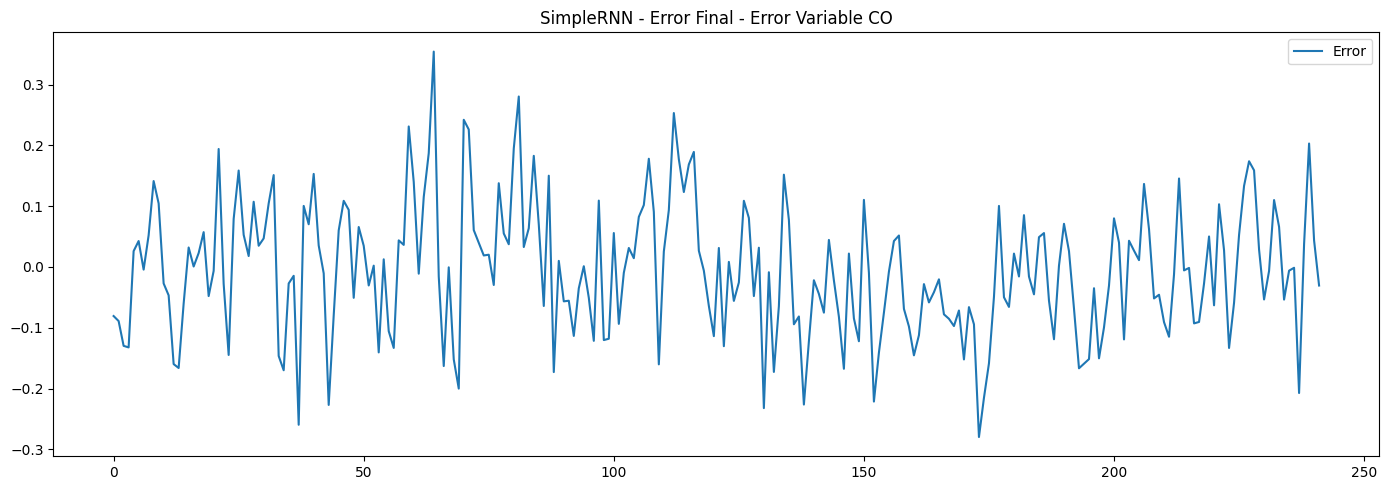

In [32]:
#VISUALIZAR PREDICCIONES Y ERRORES
plot_final_prediction(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Predicción Final')
plot_final_errors(model_simple_rnn, X_eval, y_eval, scalers, output_columns, future_steps, title='SimpleRNN - Error Final')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


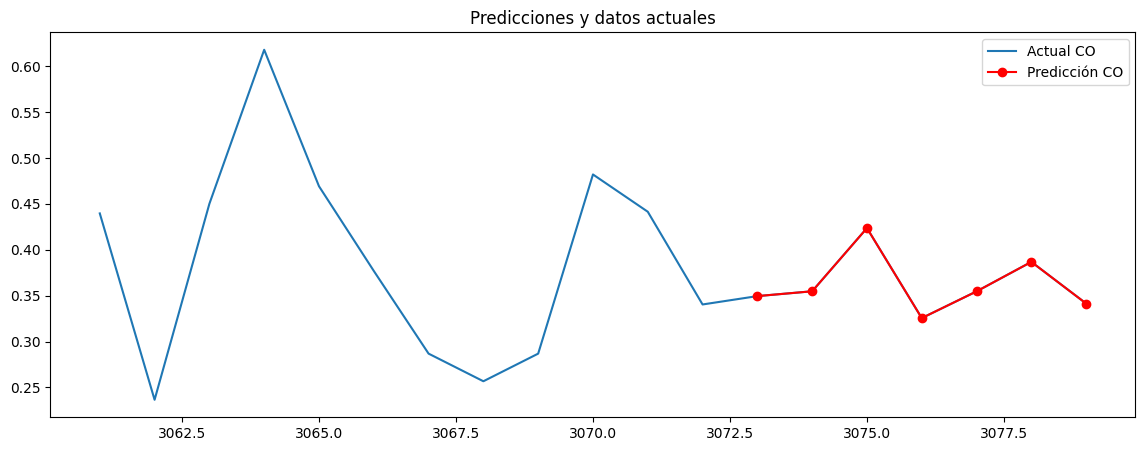

In [33]:
#VER SERIE DE TIEMPO CON  PREDICCIONES 
def add_predictions(model, data, input_columns, output_columns, time_steps, future_steps):
    """
    Añade múltiples predicciones al DataFrame de una sola vez.

    Args:
        model: Modelo entrenado.
        data (pd.DataFrame): DataFrame con los datos originales.
        input_columns (list of str): Lista de nombres de las columnas de entrada.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        time_steps (int): Número de pasos de tiempo para las secuencias.
        future_steps (int): Número de pasos de tiempo futuros a predecir.

    Returns:
        pd.DataFrame: DataFrame con las predicciones añadidas.
    """
    # Escaladores
    scalers = {col: MinMaxScaler() for col in data.columns}

    # Escalar datos
    scaled_data = data.copy()
    for col in data.columns:
        scaled_data[col] = scalers[col].fit_transform(data[[col]])

    # Seleccionar la última secuencia de time_steps
    last_seq = scaled_data[input_columns].values[-time_steps:]
    last_seq = np.expand_dims(last_seq, axis=0)

    # Realizar la predicción
    predictions_scaled = model.predict(last_seq)

    # Reescalar las predicciones
    predictions = np.zeros((future_steps, len(output_columns)))
    for i, col in enumerate(output_columns):
        predictions[:, i] = scalers[col].inverse_transform(predictions_scaled[:, i::len(output_columns)].reshape(-1, 1)).reshape(-1)

    # Crear un DataFrame para las predicciones
    predictions_df = pd.DataFrame(predictions, columns=output_columns)

    # Añadir las predicciones al DataFrame original
    data_with_predictions = pd.concat([data, predictions_df], ignore_index=True)

    return data_with_predictions

def plot_with_predictions(data, output_columns, plot_steps, future_steps):
    """
    Visualiza los datos actuales y las predicciones.

    Args:
        data (pd.DataFrame): DataFrame con los datos actuales y las predicciones.
        output_columns (list of str): Lista de nombres de las columnas de salida.
        plot_steps (int): Número de pasos de tiempo a graficar antes de la predicción.
        future_steps (int): Número de pasos de tiempo futuros a predecir.
    """
    plt.figure(figsize=(14, 5))
    for col in output_columns:
        plt.plot(data.index[-(plot_steps + future_steps):], data[col].iloc[-(plot_steps + future_steps):], label=f'Actual {col}')
        plt.plot(data.index[-future_steps:], data[col].iloc[-future_steps:], 'ro-', label=f'Predicción {col}')

    plt.title('Predicciones y datos actuales')
    plt.legend()
    plt.show()
plot_steps = 12  # Número de pasos de tiempo a graficar antes de la predicción

# Añadir predicciones y visualizar
df_with_predictions = add_predictions(model_simple_rnn, df, input_columns, output_columns, time_steps, future_steps)
plot_with_predictions(df_with_predictions, output_columns, plot_steps, future_steps)

Los datos predecidos muestran un comportamiento muy similar a los utilizados para el entrenamiento